## Iris flower classification using Decision Tree Classifier
Google video tutorial: https://goo.gl/Ngw8wi

## Load Iris open source dataset

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()

## Main attributes of Iris dataset

In [77]:
print iris.feature_names
print iris.data[0]
print iris.target_names
print iris.target[0]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2]
['setosa' 'versicolor' 'virginica']
0


## Create simple training and test sets

In [78]:
import numpy as np
test_index = [0, 50, 100]
train_data=np.delete(iris.data, test_index, axis=0)
train_target=np.delete(iris.target, test_index)
test_data=iris.data[test_index]
test_target=iris.target[test_index]  

## Train DescitionTreeClassifier with training set

In [79]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)
print clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


## Predict test set classes using trained classifier

In [83]:
print "Actual classes    %s" % test_target
print "Predicted classes %s" % clf.predict(test_data)

Actual classes    [0 1 2]
Predicted classes [0 1 2]


## Visualize Decision Tree of trained classifier

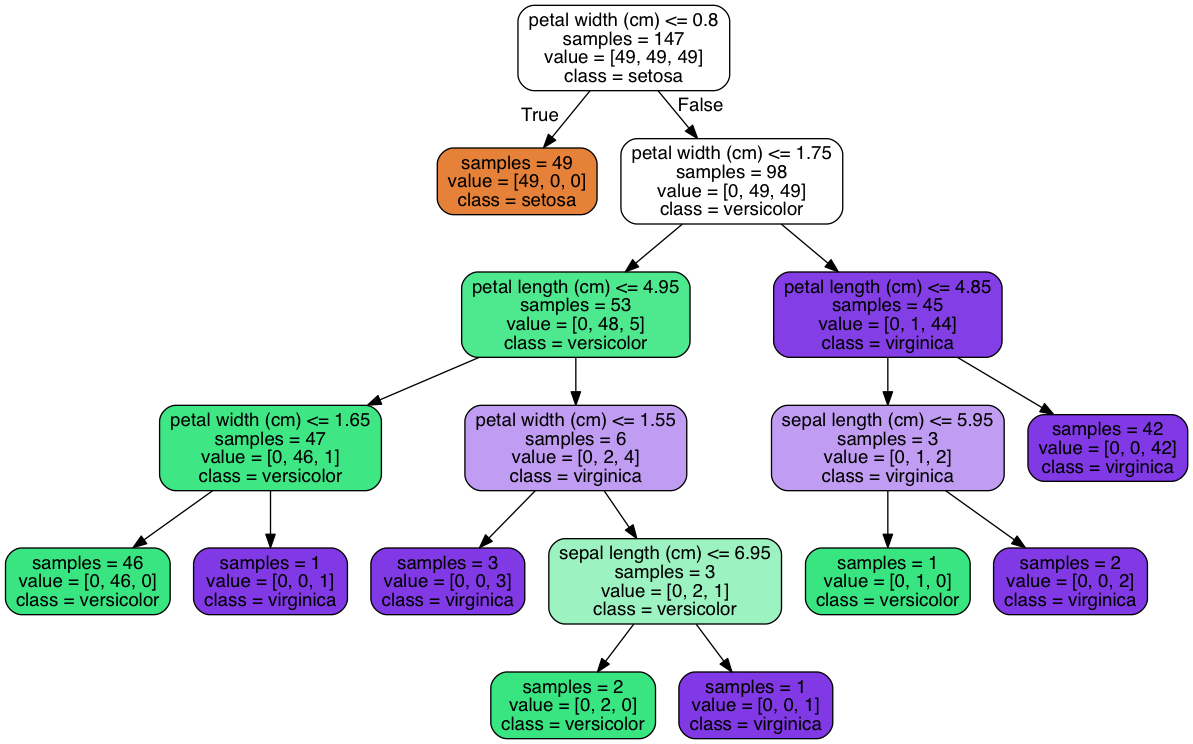

In [82]:
from sklearn.externals.six import StringIO
from IPython.display import Image 
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         impurity=False)  
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 
# output as pdf: graph.write_pdf("<some directory>/iris_dt.pdf")